In [204]:
os.getcwd()

'/Users/deanemarks/Desktop/form'

In [203]:
import datetime
now = datetime.datetime.now()
now = str(now).replace('-','_').replace(' ','___')
now

'2023_06_10___01:22:51.609898'

In [269]:

from flask import Flask, render_template, request
import pandas as pd
import os
from PIL import Image, ImageDraw , ImageFont, ImageOps, ImageFilter
import requests as r
from bs4 import BeautifulSoup
import random
import time


%run /Users/deanemarks/Desktop/Delta_Dawn_&_Python/Functions.ipynb





app = Flask(__name__)
@app.route('/', methods=['GET', 'POST'])

            
            
def index():

    if request.method == 'POST':
        
        
        if 'form1-submit' in request.form:
            
            #read in the file from the html
            file = request.files['imageFile']
            
            #define_now:
            global now
            now = datetime.datetime.now()
            now = str(now).replace('-','_').replace(' ','___').replace('.','____')
            
            
            #create a new folder in the uploads folder:
            os.mkdir(f'/Users/deanemarks/Desktop/form/static/uploads/{now}')
            
            
            #save the file
            file.save(f'/Users/deanemarks/Desktop/form/static/uploads/{now}/logo.png')
            
            
            #read in the file
            logo = Image.open(f"/Users/deanemarks/Desktop/form/static/uploads/{now}/logo.png").convert('RGBA')
            
            

            #how do I activate this? 
            #logo = kill_white(logo)
            

                
            #read in the shapes
            front_shape = Image.open(f"/Users/deanemarks/Desktop/bow/shapes/front.png").convert('RGBA')
            back_shape = Image.open(f"/Users/deanemarks/Desktop/bow/shapes/back.png").convert('RGBA')
            center_shape = Image.open(f"/Users/deanemarks/Desktop/bow/shapes/center.png").convert('RGBA')
            strap_shape = Image.open(f"/Users/deanemarks/Desktop/bow/shapes/strap.png").convert('RGBA')





            Y = 1

            while Y < 11:
            #while Y < 2:


                if Y == 1:
                    logo_size = 50

                if  Y == 2:
                    logo_size = 75

                if  Y == 3:
                    logo_size = 100   

                if  Y == 4:
                    logo_size = 125

                if  Y == 5:
                    logo_size = 150

                if  Y == 5:
                    logo_size = 175

                if  Y == 7:
                    logo_size = 200   

                if  Y == 8:
                    logo_size = 225

                if  Y == 9:
                    logo_size = 250

                if  Y == 10:
                    logo_size = 275




                logo = resize_img_porportional_by_height(img = logo, 
                                          desired_height = logo_size )


                #selects smallest side as the margin
                size_list = list(logo.size)
                size_list.sort()
                logo_margin = size_list[0]
                logo_margin = int(logo_margin/ 2)

                #transparent brick layer with logos
                ########################################
                brick = brick_logo(
                           Y_margin = logo_margin, 
                           X_margin = logo_margin, 
                           Z_margin= logo_margin, 
                           logo_rotation=0, 
                           logo_variable = logo, 
                           img_variable = front_shape)



                # create a Mask from bow shapes and transparent logo brick 
                front_mask = mask(shape_image = front_shape , design_image = brick )
                center_mask = mask(shape_image = center_shape , design_image = brick.rotate(90) )
                brick = shift_image(brick, lef_right_variable = 20, up_down_variable = 0)   #shift the brick
                back_mask = mask(shape_image = back_shape  , design_image = brick.rotate(180))
                brick = shift_image(brick, lef_right_variable = -20, up_down_variable = 0) #SHIFT THE BRICK BACK? 
                strap_mask = mask(shape_image = strap_shape  , design_image = brick )




                #put combine the images
                result = Image.alpha_composite(strap_mask, back_mask)
                result = Image.alpha_composite(result, front_mask)
                result = Image.alpha_composite(result, center_mask)



                result.save(f'/Users/deanemarks/Desktop/form/static/uploads/{now}/{Y}.png')
                print(Y)

                Y+=1 



            #delete everything 
            def delete_files_in_folder(folder_path):
                # Get all the files in the folder
                files = os.listdir(folder_path)

                # Iterate over each file and delete it
                for file_name in files:
                    file_path = os.path.join(folder_path, file_name)
                    if os.path.isfile(file_path):
                        os.remove(file_path)

                        
            #delete_files_in_folder('/Users/deanemarks/Desktop/form/uploads')

            

            
            #return render_template('index3.html')
            return render_template('index3.html', html_variable = now), now

        
        
        
        if 'form2-submit' in request.form:
            # Action for Form 2 submission
            #return 'Form 2 submitted!'
    
        
            front = request.form.get('front-select')
            center = request.form.get('center-select')
            back = request.form.get('back-select')
            logo_size = request.form.get('logo-select')
            
            logo_location = f'/Users/deanemarks/Desktop/form/static/uploads/{now}/logo.png'

            # Append DataFrame to an existing CSV file
            df = pd.DataFrame([front,center,back, logo_size, logo_location] ).T
            csv_file = 'orders.csv'
            df.to_csv(csv_file, mode='a', header=False, index=False)

        
        #what appears on the screen after you hit submit
        #print(d1,d2,d3)
        return f"you selected, {front}, {center}, {back}, {logo_size}, {logo_location} "  
        
        

        
    #this is where the HTML Goes.
    #############################################################
    return render_template('index.html')
    #############################################################

    
    
    
    

In [270]:
app.run(host='0.0.0.0', port=5000)

 * Serving Flask app '__main__'
 * Debug mode: off


 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://192.168.1.66:5000
Press CTRL+C to quit
127.0.0.1 - - [10/Jun/2023 02:59:21] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2023 02:59:21] "GET /static/logo_mask/0.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:21] "GET /static/center_colors/white.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:21] "GET /static/front_colors/white.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:21] "GET /static/strap_colors/white.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:21] "GET /static/back_colors/white.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:21] "GET /static/images/color_pallet_2.png HTTP/1.1" 304 -


1
2
3
4
5
6
7
8
9


127.0.0.1 - - [10/Jun/2023 02:59:34] "POST / HTTP/1.1" 0 -
127.0.0.1 - - [10/Jun/2023 02:59:34] "GET /static/uploads/2023_06_10___02:59:30____965971/1.png HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2023 02:59:34] "GET /static/center_colors/white.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:34] "GET /static/front_colors/white.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:34] "GET /static/back_colors/white.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:34] "GET /static/images/color_pallet_2.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:34] "GET /static/strap_colors/white.png HTTP/1.1" 304 -


10


127.0.0.1 - - [10/Jun/2023 02:59:37] "GET /static/uploads/2023_06_10___02:59:30____965971/7.png HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2023 02:59:41] "GET /static/uploads/2023_06_10___02:59:30____965971/4.png HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2023 02:59:45] "GET /static/front_colors/blue_spruce.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:47] "GET /static/center_colors/berry.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:47] "GET /static/strap_colors/berry.png HTTP/1.1" 304 -
127.0.0.1 - - [10/Jun/2023 02:59:49] "GET /static/back_colors/butter.png HTTP/1.1" 200 -
127.0.0.1 - - [10/Jun/2023 02:59:53] "POST / HTTP/1.1" 200 -


In [265]:
os.getcwd()

'/Users/deanemarks/Desktop/form'

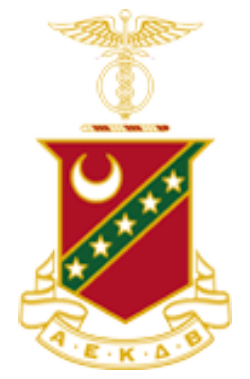

In [271]:
Image.open(f"/Users/deanemarks/Desktop/form/static/uploads/2023_06_10___02:59:30____965971/logo.png").convert('RGBA')


In [272]:
pip freeze > requirements.txt

Note: you may need to restart the kernel to use updated packages.
